In [1]:
import import_ipynb

In [2]:
import CSD_function_Copy2 as CSD

importing Jupyter notebook from CSD_function_Copy2.ipynb


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, ntpath
import imageio

In [4]:
# Given the range of the rectangle
lenX = CSD.lenX
lenY = CSD.lenY

D = CSD.D

deltaX = CSD.deltaX # mm
deltaY = CSD.deltaY # mm
deltaT = CSD.deltaT

Kr = CSD.Kr

In [5]:
# Given Initial values
maxIter = 500
K = np.full([lenX, lenY], Kr, dtype=np.float64)
Kt = np.zeros([lenX, lenY], dtype=np.float64)
R = np.zeros([lenX, lenY], dtype=np.float64)
Rt = np.zeros([lenX, lenY], dtype=np.float64)

In [6]:
center_point_loc = np.array([int(lenX/2),int(lenY/2)])

In [10]:
maxIter = 2000
clamping_value=0.9
clamping_radius=15
clamping_ticks=50
clamping_ticks_end=2000

foucs_loc=np.array([[int(lenX/2),int(lenY/2)],
                     [int(lenX/2)+10,int(lenY/2)+10],
                   [int(lenX/2)+30,int(lenY/2)+30]])

In [ ]:
record_K_value = CSD_function_Copy2.Dirichlet_bd(maxIter, clamping_value, clamping_radius,
                                 clamping_ticks, clamping_ticks_end,
                                 foucs_loc,
                                 K, Kt, R, Rt,
                                 Kr, Kr, Kr, Kr)

In [11]:
# Diri, Neum, Perid
point_value, R_value, speed = CSD.compute_fick_law('Diri', maxIter,
                     clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
                     foucs_loc, K, Kt, R, Rt, 
                     Kr, Kr, Kr, Kr)

# point_value, R_value = CSD_function.compute_fick_law('Neum', maxIter,
#                      clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
#                      foucs_loc, K, Kt, R, Rt, 
#                      Kr, Kr, Kr, Kr)

# point_value, R_value = CSD_function.compute_fick_law('Perid', maxIter,
#                      clamping_value, clamping_radius, clamping_ticks, clamping_ticks_end,
#                      foucs_loc, K, Kt, R, Rt)

100%|██████████| 2000/2000 [08:49<00:00,  4.07it/s]


In [12]:
speed

0.8530805687203791

In [4]:
clamping_value=np.arange(0.1,1.1,0.1)
clamping_value

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
clamping_radius=np.arange(1,11,1)
clamping_radius

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
result_point_value_time=pymp.shared.array((clamping_radius.shape[0]*clamping_value.shape[0],maxIter,4))
result_R_value_time=pymp.shared.array((clamping_radius.shape[0]*clamping_value.shape[0],maxIter,4))
result_speed = pymp.shared.array(clamping_radius.shape[0]*clamping_value.shape[0])

with pymp.Parallel(20) as p:
    for x in p.range(clamping_value.shape[0]*clamping_radius.shape[0]):
        
        print(x)

        j = int(x/end_time.shape[0])
        i = int(x - j*end_time.shape[0])
        
        
        foucs_loc=np.array([[int(lenX/2),int(lenY/2),int(lenZ/2)],
                            [int(lenX/2+clamping_radius[i]+2),int(lenY/2),int(lenZ/2)],
                           [int(lenX/2+clamping_radius[i]*2),int(lenY/2),int(lenZ/2)],
                           [int(lenX/2+clamping_radius[i]*3),int(lenY/2),int(lenZ/2)]])

        point_value, R_value, speed = CSD.compute_fick_law('Diri', maxIter,
                             clamping_value[j], clamping_radius[i], clamping_ticks, end_time,
                             foucs_loc, K, Kt, R, Rt, 
                             Kr, Kr, Kr, Kr, Kr, Kr)

        result_point_value_time[j*clamping_radius.shape[0]+i,:,:] = point_value
        result_R_value_time[j*clamping_radius.shape[0]+i,:,:] = R_value
        result_speed[j*clamping_radius.shape[0]+i]

In [9]:
point_value.shape

(1000, 3)

In [10]:
K_R_value = np.zeros((maxIter,foucs_loc.shape[0],2))
K_R_value[:,:,0] = point_value
K_R_value[:,:,1] = R_value

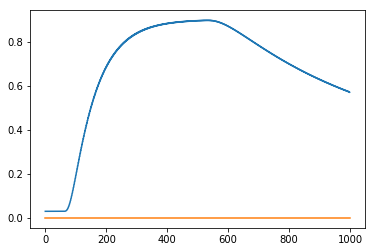

In [11]:
plt.plot( K_R_value[:,0,:])

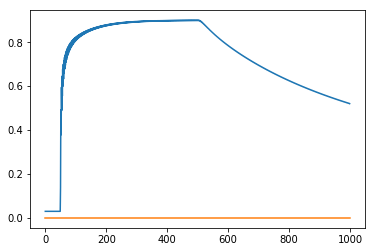

In [12]:
plt.plot( K_R_value[:,1,:])

In [8]:
noconv_point_value, noconv_R_value = CSD_function.Dirichlet_noconv( maxIter,
                                                       clamping_value, clamping_radius,
                                                       clamping_ticks, clamping_ticks_end,
                                                       foucs_loc,
                                                       K, R)

100%|██████████| 500/500 [00:05<00:00, 99.80it/s] 


In [9]:
noconv_K_R_value = np.zeros((maxIter,foucs_loc.shape[0],2))
noconv_K_R_value[:,:,0] = noconv_point_value
noconv_K_R_value[:,:,1] = noconv_R_value

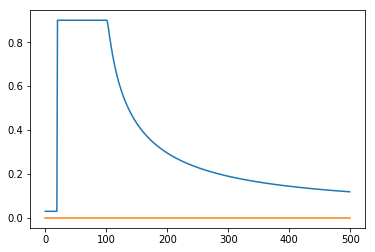

In [10]:
plt.plot( noconv_K_R_value[:,0,:])

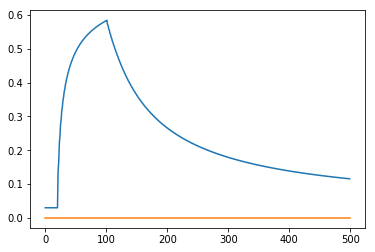

In [11]:
plt.plot( noconv_K_R_value[:,1,:])

In [13]:
# load all timesteps images
images = []
for image in sorted(glob.glob('../images/Diri/*.png'), key=lambda k: int(ntpath.basename(k).replace('.png', ''))):
    images.append(imageio.imread(image))

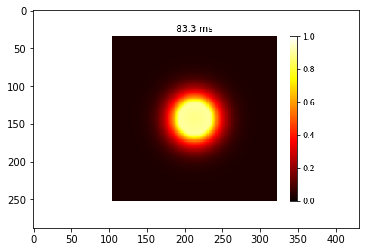

In [14]:
plt.imshow(images[400])

In [18]:
image_folder = '../images/Diri'
video_name = '../vedio/Diffusion_donuts.mp4'

images = []
for i in range(maxIter):
    images.append( str(int(i)) + ".png")

CSD_function.make_video(images, image_folder, video_name, outimg=None, fps=100, size=None, is_color=True, format="XVID")

<VideoWriter 0x12d9031f0>